

# 项目：调查数据集（TMDb电影数据 ）

## 目录
<ul>
<li><a href="#intro">简介</a></li>
<li><a href="#wrangling">数据整理</a></li>
<li><a href="#eda">探索性数据分析</a></li>
<li><a href="#conclusions">结论</a></li>
</ul>

<a id='intro'></a>
## 简介



> 本数据集中包含 1 万条电影信息，信息来源为“电影数据库”（TMDb，The Movie Database），包括每部电影的导演，演员，用户评分，票房，预算，上映日期等等共21项信息。其中由一些信息是与本次数据分析无关，因此我们将会删除这些无关列，并对数据进行一些必要的整理。整理数据过后，我们将分析有哪些因素会影响用户评分，比如电影的预算，票房（我们将使用带有'_adj'后缀的预算和票房进行数据分析，因为这样会得到更可靠的结果）。我们还将探索电影的受欢迎度对用户评分数量的影响，以及不同年份上映的电影的评分情况。在进行可视化分析后会给出最后的结论。

In [1]:
#   导入语句。
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline




<a id='wrangling'></a>
## 数据整理

### 常规属性

In [2]:
# 加载数据并打印几行。进行这几项操作，来检查数据
df = pd.read_csv('tmdb-movies.csv')
df.head(3)



,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [3]:
# 查看数据类型，以及是否有缺失数据或错误数据的情况。
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

从上面信息表中我们可以看出电影数据表有21列，10866行信息，其中有9列存在缺失值，'release_date'列的数据类型不正确。              

In [4]:
# 查看冗余行
sum(df.duplicated())


1

从上面的结果可以看出电影数据表只有一行冗余行  
针对数据的这些问题，我们将会在下面部分进行处理

### 删除无关列

删除与我们的问题无关的列  
要删除的列：`id`, `imdb_id`, `homepage`, `tagline`, `keywords`, `overview`, `production_companies`

In [5]:
# 从电影数据集中丢弃列
df.drop(['id', 'imdb_id', 'homepage', 'tagline', 'keywords', 'overview', 'production_companies'], axis=1, inplace=True)   

# 确认更改
df.head(1)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


### 丢弃含有缺失值的行


In [6]:
# 查看电影数据集每个特征的缺失值数量
df.isnull().sum()

popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          44
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

In [7]:
# 丢弃数据集中有空值的行
df.dropna(axis = 0, inplace=True)

In [8]:
# 检查数据集任何列是否有空值 - 应显示为“假”
df.isnull().sum().any()

False

### 删除重复数据

In [9]:
# 丢弃数据集中的重复数据
df.drop_duplicates(inplace=True)

In [10]:
# 再次查看重复数量，确认重复数据已删除——应为 0 
sum(df.duplicated())

0

### 修改数据类型

In [11]:
#'release_date'列的数据类型改为‘datetime’
df['release_date'] = pd.to_datetime(df['release_date'])

In [12]:
#确认数据类型已更改
print(df['release_date'].dtype)

datetime64[ns]


<a id='eda'></a>
## 探索性数据分析


### 1. 用户评分与票房收入之间的关系

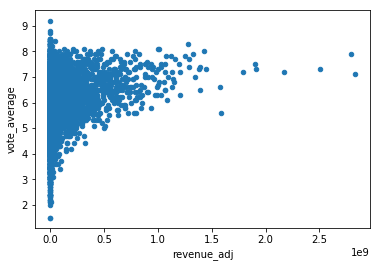

In [13]:
#将用户评分与票房收入的关系通过散点图进行可视化
df.plot(x='revenue_adj', y='vote_average', kind='scatter');


通过上图可以看出用户评分和票房收入之间存在一定的正相关的关系，但这种关系不是很明显。

### 2. 用户评分与电影预算之间的关系

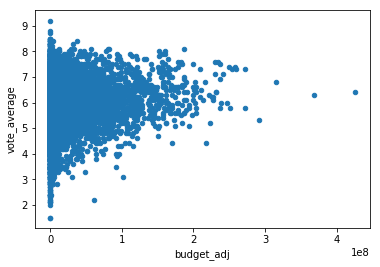

In [14]:
#将用户评分与电影预算的关系通过散点图进行可视化
df.plot(x='budget_adj', y='vote_average', kind='scatter');

与用户评分和票房收入的关系相似，用户评分和电影预算也存在一定的正相关性。

### 3. 用户评分与用户评分数量的关系

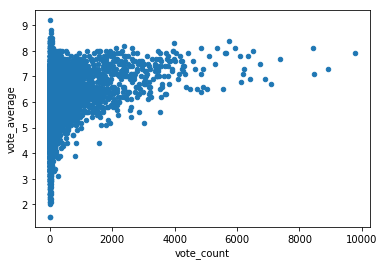

In [15]:
#将用户评分与用户评分数量的关系通过散点图进行可视化
df.plot(x='vote_count', y='vote_average', kind='scatter');

用户评分和用户评分数量也存在一定的正相关性，但不存在必然的联系。

### 4. 用户评分数量与电影受欢迎度之间的关系

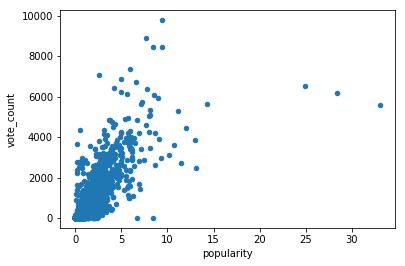

In [16]:
# 将用户评分数量与电影受欢迎度的关系通过散点图进行可视化
df.plot(x='popularity', y='vote_count', kind='scatter');

通过上图可以明显看出，用户评分与电影受欢迎度是正相关关系。

### 5. 各个年份所有电影的评分均值的对比
（我们将研究近20年每年电影的年平均评分的走势）

In [17]:
# 选取近20年的电影作为研究对象
df_1 = df.query('release_year > 1995')

In [18]:
# 对每个年份的电影进行分组并求出每个年份的电影评分平均值
df_1.groupby(['release_year']).mean()['vote_average']

release_year
1996    5.897044
1997    5.983246
1998    5.970476
1999    6.032589
2000    5.878125
2001    5.890871
2002    5.970455
2003    5.930961
2004    5.988599
2005    5.859003
2006    5.931931
2007    5.961574
2008    5.908642
2009    5.838476
2010    5.962947
2011    5.943421
2012    5.775610
2013    5.862250
2014    5.896628
2015    5.859319
Name: vote_average, dtype: float64

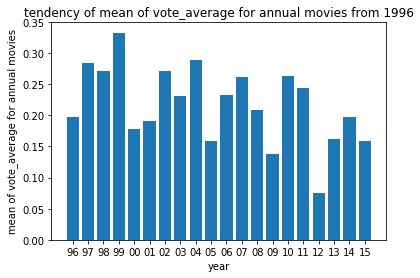

In [19]:
locations = range(1,21)
heights = df_1.groupby('release_year')['vote_average'].mean() - 5.7
#减去‘5.7’是为了更好的作对比。
labels = ['96', '97', '98', '99','00','01','02','03','04','05','06','07','08','09','10','11','12','13','14','15']
plt.bar(locations, heights, tick_label=labels)
plt.title('tendency of mean of vote_average for annual movies from 1996')
plt.xlabel('year')
plt.ylabel('mean of vote_average for annual movies');

从上图可以看出，近20年的电影平均评分存在一定的下滑趋势。

<a id='conclusions'></a>
## 结论
### 通过对TMDb电影数据进行可视化的数据分析后，我们主要得出了以下结论：
1. 票房收入，电影预算，用户评分数量三个变量对用户评分的高低没有明显的影响，只可能存在一定的正相关性。
2. 从电影受欢迎度与用户评分数量的散点图可以看出，二者存在正相关性的可能比较大。
3. 从近20年的年均电影评分趋势图可以得出，年均电影评分可能存在下降的趋势，但这种趋势不明显。
4. 需要指出的是，由于知识的局限，以上结论只是一个暂时的结论，今后可能还会做出进一步的修正。
